Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.2770 - val_loss: 0.1907
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1717 - val_loss: 0.1546
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1457 - val_loss: 0.1353
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1298 - val_loss: 0.1214
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1173 - val_loss: 0.1113
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1095 - val_loss: 0.1051
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1044 - val_loss: 0.1012
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1009 - val_loss: 0.0981
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0985 - val_loss: 0.0963
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0970 - val_loss: 0.0951
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0960 - val_loss: 0.0942
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

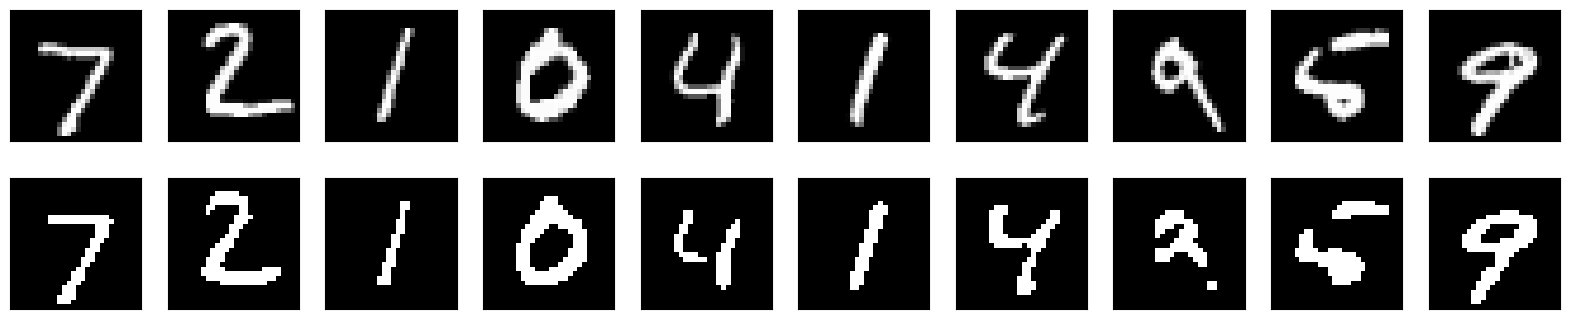

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

# 1. Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# 2. Normalize and reshape
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten 28x28 images to 784-dimensional vectors
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))  # (60000, 784)
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))      # (10000, 784)

# 3. Build the autoencoder model
input_img = Input(shape=(784,))

# Encoder: 784 → 32
encoded = Dense(32, activation='relu')(input_img)

# Decoder: 32 → 784
decoded = Dense(784, activation='sigmoid')(encoded)

# Full autoencoder model: input → reconstructed output
autoencoder = Model(input_img, decoded)

# 4. Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 5. Train the model
history = autoencoder.fit(
    x_train, x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# 6. Evaluate on test data
test_loss = autoencoder.evaluate(x_test, x_test)
decoded_imgs = autoencoder.predict(x_test)

# 7. Compute pixel-wise accuracy using a threshold
threshold = 0.5

# Binarize original and reconstructed images
x_test_bin = np.where(x_test >= threshold, 1, 0)
decoded_bin = np.where(decoded_imgs >= threshold, 1, 0)

# Correctly predicted pixels
correct_predictions = np.sum(x_test_bin == decoded_bin)

# Total number of pixels
total_pixels = x_test.shape[0] * x_test.shape[1]

test_accuracy = correct_predictions / total_pixels

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# 8. Visualize original vs reconstructed images
n = 10  # number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed (thresholded)
    ax = plt.subplot(2, n, i + 1 + n)
    reconstruction = decoded_imgs[i].reshape(28, 28)
    reconstruction_bin = np.where(reconstruction >= threshold, 1.0, 0.0)
    plt.imshow(reconstruction_bin, cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()